## Import Library

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Data Pre-processing

In [2]:
#import data
df = pd.read_csv('dataset/Work Health.csv')
df.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K


In [3]:
df[['Mental_Health_Status', 'Physical_Health_Issues']] = df[['Mental_Health_Status', 'Physical_Health_Issues']].fillna('None')
df.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,None,Medium,5,None,4,$60K-80K


In [4]:
#inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     3157 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   3157 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

In [5]:
#cek duplikasi data
df.duplicated().sum()

np.int64(0)

In [6]:
#cek missing value
df.isna().sum()

Survey_Date                0
Age                        0
Gender                     0
Region                     0
Industry                   0
Job_Role                   0
Work_Arrangement           0
Hours_Per_Week             0
Mental_Health_Status       0
Burnout_Level              0
Work_Life_Balance_Score    0
Physical_Health_Issues     0
Social_Isolation_Score     0
Salary_Range               0
dtype: int64

In [7]:
#menghapus missing value
df =df.dropna()
df.shape

(3157, 14)

In [8]:
#konversi tipe data yang belum sesuai
#konversi kolom survey date
df['Survey_Date'] = pd.to_datetime(df['Survey_Date'], format='%Y-%m-%d')
df.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,None,Medium,5,None,4,$60K-80K


In [9]:
#memisahkan data kategorikal dan numerik
nums = df.select_dtypes(include=['number']).columns.tolist()
cats = df.select_dtypes(exclude=['number']).columns.tolist()
df[nums].head()

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score
0,27,64,3,2
1,37,37,4,2
2,32,36,3,2
3,40,63,1,2
4,30,65,5,4


In [10]:
df[cats].head()

,Survey_Date,Gender,Region,Industry,Job_Role,Work_Arrangement,Mental_Health_Status,Burnout_Level,Physical_Health_Issues,Salary_Range
0,2025-06-01,Female,Asia,Professional Services,Data Analyst,Onsite,Stress Disorder,High,Shoulder Pain; Neck Pain,$40K-60K
1,2025-06-01,Female,Asia,Professional Services,Data Analyst,Onsite,Stress Disorder,High,Back Pain,$80K-100K
2,2025-06-01,Female,Africa,Education,Business Analyst,Onsite,ADHD,High,Shoulder Pain; Eye Strain,$80K-100K
3,2025-06-01,Female,Europe,Education,Data Analyst,Onsite,ADHD,Medium,Shoulder Pain; Eye Strain,$60K-80K
4,2025-06-01,Male,South America,Manufacturing,DevOps Engineer,Hybrid,None,Medium,None,$60K-80K


In [11]:
df.describe().round(2)

,Survey_Date,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score
count,3157,3157.00,3157.0,3157.00,3157.00
mean,2025-06-13 13:29:37.763699712,43.73,49.9,3.00,2.70
min,2025-06-01 00:00:00,22.00,35.0,1.00,1.00
25%,2025-06-07 00:00:00,33.00,42.0,2.00,2.00
50%,2025-06-14 00:00:00,44.00,50.0,3.00,3.00
75%,2025-06-20 00:00:00,55.00,57.0,4.00,4.00
max,2025-06-26 00:00:00,65.00,65.0,5.00,5.00
std,NaN,12.66,8.9,1.16,1.19


In [12]:
#mendeskripsikan data
df.describe(include='object')

,Gender,Region,Industry,Job_Role,Work_Arrangement,Mental_Health_Status,Burnout_Level,Physical_Health_Issues,Salary_Range
count,3157,3157,3157,3157,3157,3157,3157,3157,3157
unique,4,6,9,24,3,7,3,32,5
top,Male,South America,Professional Services,Research Scientist,Onsite,None,Medium,None,$60K-80K
freq,1535,575,730,151,1562,799,1366,280,1014


In [13]:
#deteksi outlier
# Dengan metode Z-Scores
z_scores = np.abs(stats.zscore(df[nums])) 

#ambil baris yang memiliki z-scores > 3
outliers_z = df[(z_scores > 3).any(axis=1)] 

#menghitung jumlah outlier
print('Jumlah outlier (z-score >3): ', outliers_z.shape[0]) 

Jumlah outlier (z-score >3):  0


In [14]:
#Deteksi outlier dengan metode IQR
Q1 = df[nums].quantile(0.25)
Q3 = df[nums].quantile(0.75)
IQR = Q3 -Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_outlier = df[((df[nums] < lower_bound) | (df[nums] > upper_bound)).any(axis=1)]
print('Data Outlier: ', df_outlier.shape[0], 'baris')

Data Outlier:  0 baris


## Feature Engineering

1. Membuat kolom baru yang mengelompokkan jam kerja responden per minggu untuk menilai apakah responden termasuk overwork dan digunakan nantinya untuk analisis pengaruhnya terhadap kesehatan mereka.

In [15]:
rata_lama_waktu = (df['Hours_Per_Week'].mean())
print('rata-rata jam kerja responden per minggu adalah: ', rata_lama_waktu)

rata-rata jam kerja responden per minggu adalah:  49.90497307570478


In [16]:
df['Working_Hours_Category'] = [
    'Overtime' if n >= 50
    else 'Standard' if n == 50
    else 'Below Average'
    for n in df['Hours_Per_Week']
]
df[['Job_Role', 'Hours_Per_Week', 'Working_Hours_Category']].head()

,Job_Role,Hours_Per_Week,Working_Hours_Category
0,Data Analyst,64,Overtime
1,Data Analyst,37,Below Average
2,Business Analyst,36,Below Average
3,Data Analyst,63,Overtime
4,DevOps Engineer,65,Overtime


In [17]:
df.groupby('Working_Hours_Category').count().reset_index()

,Working_Hours_Category,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,Below Average,1551,1551,1551,1551,1551,1551,1551,1551,1551,1551,1551,1551,1551,1551
1,Overtime,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606,1606


2. Mengkategorikan gaji responden untuk menentukan apakah mereka termasuk well-paid, underpaid, atau upper-paid, sehingga dapat diketahui pengaruh tingkat gaji terhadap kesehatan responden.

In [18]:
df['Categorize_Salary'] = [
    'Top_paid' if n == '$120K+'
    else 'Underpaid' if n == '$40K-60K'
    else 'Average' if n == '$60K-80K'
    else 'Well_paid' if n == '$80K-100K'
    else 'Upper-paid' if n == '$100K-120K'
    else 'Unknown'
    for n in df['Salary_Range']
]
df[['Job_Role', 'Salary_Range', 'Categorize_Salary']].head()

,Job_Role,Salary_Range,Categorize_Salary
0,Data Analyst,$40K-60K,Underpaid
1,Data Analyst,$80K-100K,Well_paid
2,Business Analyst,$80K-100K,Well_paid
3,Data Analyst,$60K-80K,Average
4,DevOps Engineer,$60K-80K,Average


3. menambahkan kolom baru yaitu banyaknya physical pain yang dialami oleh responden

In [19]:
df['Physical_Pain_Count'] = df['Physical_Health_Issues'].apply(
    lambda x: 0 if str(x).lower() == 'none' else len(str(x).split(';'))
)
df[['Physical_Health_Issues','Physical_Pain_Count']].head()

,Physical_Health_Issues,Physical_Pain_Count
0,Shoulder Pain; Neck Pain,2
1,Back Pain,1
2,Shoulder Pain; Eye Strain,2
3,Shoulder Pain; Eye Strain,2
4,None,0


## Grouping and Aggregation

1. Mengelompokkan work life balance score berdasarkan gender dan sistem kerja, untuk mengetahui apakah perbedaan gender dan sistem kerja berpengaruh terhadap rata-rata work life balance score responden

In [20]:
mean_wlb = df.groupby(['Gender', 'Work_Arrangement'])['Work_Life_Balance_Score'].mean().reset_index().round(2)
mean_wlb

,Gender,Work_Arrangement,Work_Life_Balance_Score
0,Female,Hybrid,2.92
1,Female,Onsite,3.06
2,Female,Remote,3.06
3,Male,Hybrid,2.98
4,Male,Onsite,2.98
5,Male,Remote,2.94
6,Non-binary,Hybrid,3.03
7,Non-binary,Onsite,3.27
8,Non-binary,Remote,3.00
9,Prefer not to say,Hybrid,2.36


2. Mengelompokkan jenis pekerjaan spesifik dengan usia dari responden/pekerja

In [21]:
mean_jra =df.groupby('Job_Role')['Age'].mean().reset_index().round(1)
mean_jra

,Job_Role,Age
0,Account Manager,43.1
1,Business Analyst,44.6
2,Consultant,43.2
3,Content Writer,43.9
4,Customer Service Manager,44.8
5,Data Analyst,43.2
6,Data Scientist,43.1
7,DevOps Engineer,42.9
8,Digital Marketing Specialist,45.3
9,Executive Assistant,42.7


3. Menghitung jumlah responden di setiap job role dan rata-rata jam kerja per minggu nya

In [22]:
count_res = df.groupby('Job_Role')['Hours_Per_Week'].agg(['mean', 'count']).reset_index().sort_values(by='mean', ascending=False).round(2)
count_res

,Job_Role,mean,count
8,Digital Marketing Specialist,51.85,119
22,Technical Writer,50.87,118
10,Financial Analyst,50.79,116
6,Data Scientist,50.48,136
19,Sales Representative,50.29,114
9,Executive Assistant,50.28,119
15,Product Manager,50.27,133
12,IT Support,50.22,140
21,Software Engineer,50.20,128
5,Data Analyst,50.11,143


4. menghitung jumlah dari setiap tingkat burn out level responden 

In [23]:
df.groupby('Burnout_Level')['Gender'].count().reset_index()

,Burnout_Level,Gender
0,High,1046
1,Low,745
2,Medium,1366


5. menghitung rata-rata physical pain yang diderita oleh responden berdasarkan work arrangementnya

In [24]:
df.groupby('Work_Arrangement')['Physical_Pain_Count'].sum().reset_index().round(1)

,Work_Arrangement,Physical_Pain_Count
0,Hybrid,1858
1,Onsite,2940
2,Remote,1141


6. mengelompokkan tingkat work life balance responden berdasarkan sistem kerja 

In [25]:
agg = df.groupby('Work_Arrangement')['Work_Life_Balance_Score'].agg(['mean', 'count']).reset_index().round(2)
agg

,Work_Arrangement,mean,count
0,Hybrid,2.95,1007
1,Onsite,3.03,1562
2,Remote,2.99,588


In [26]:
jamkerja_gaji = df.groupby(['Working_Hours_Category', 'Categorize_Salary']).size().reset_index(name='Jumlah')
jamkerja_gaji

,Working_Hours_Category,Categorize_Salary,Jumlah
0,Below Average,Average,516
1,Below Average,Top_paid,95
2,Below Average,Underpaid,255
3,Below Average,Upper-paid,216
4,Below Average,Well_paid,469
5,Overtime,Average,498
6,Overtime,Top_paid,115
7,Overtime,Underpaid,255
8,Overtime,Upper-paid,243
9,Overtime,Well_paid,495


## Advanced EDA Techniques

In [27]:
df.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range,Working_Hours_Category,Categorize_Salary,Physical_Pain_Count
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K,Overtime,Underpaid,2
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K,Below Average,Well_paid,1
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K,Below Average,Well_paid,2
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K,Overtime,Average,2
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,None,Medium,5,None,4,$60K-80K,Overtime,Average,0


In [28]:
df.groupby('Industry').count()

,Survey_Date,Age,Gender,Region,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range,Working_Hours_Category,Categorize_Salary,Physical_Pain_Count
Industry,,,,,,,,,,,,,,,,
Customer Service,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173,173
Education,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287
Finance,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367
Healthcare,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247
Manufacturing,370,370,370,370,370,370,370,370,370,370,370,370,370,370,370,370
Marketing,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202
Professional Services,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730,730
Retail,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188
Technology,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593


In [29]:
jamkerja = df.groupby('Working_Hours_Category').size().reset_index(name='Jumlah')
jamkerja

,Working_Hours_Category,Jumlah
0,Below Average,1551
1,Overtime,1606


In [30]:
reg_wlb = df.groupby('Region')['Work_Life_Balance_Score'].mean().reset_index().round(2)
reg_wlb

,Region,Work_Life_Balance_Score
0,Africa,2.99
1,Asia,3.23
2,Europe,3.19
3,North America,2.96
4,Oceania,2.83
5,South America,2.81


In [31]:
#filtering
#mencari responden dengan usia diatas 64 tahun
#digunakan usia 64 tahun sebagai batas karena menurut (Börsch-Supan & Weiss, 2016) usia produktif pekerja berada pada rentang 15-64
df_over64 = df[df['Age'] > 64]
df_over64.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range,Working_Hours_Category,Categorize_Salary,Physical_Pain_Count
44,2025-06-01,65,Female,Europe,Education,UX Designer,Onsite,61,Burnout,Low,4,Back Pain; Shoulder Pain; Eye Strain; Neck Pain,1,$40K-60K,Overtime,Underpaid,4
81,2025-06-01,65,Female,Africa,Manufacturing,Executive Assistant,Onsite,64,Depression,Medium,4,Back Pain,3,$40K-60K,Overtime,Underpaid,1
86,2025-06-01,65,Male,North America,Healthcare,IT Support,Onsite,45,Anxiety,Low,4,None,1,$120K+,Below Average,Top_paid,0
224,2025-06-03,65,Female,Asia,Technology,Operations Manager,Hybrid,55,Stress Disorder,Low,5,Back Pain; Eye Strain,2,$80K-100K,Overtime,Well_paid,2
256,2025-06-03,65,Male,Europe,Technology,Marketing Specialist,Hybrid,59,None,Medium,3,Back Pain; Shoulder Pain; Eye Strain,3,$80K-100K,Overtime,Well_paid,3


In [32]:
#filtering responden dengan job role data analyst & data scientist
df_data = df[df['Job_Role'].isin(['Data Analyst', 'Data Scientist'])]
df_data.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range,Working_Hours_Category,Categorize_Salary,Physical_Pain_Count
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K,Overtime,Underpaid,2
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K,Below Average,Well_paid,1
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K,Overtime,Average,2
12,2025-06-01,25,Female,Oceania,Technology,Data Scientist,Hybrid,57,Burnout,High,2,Back Pain; Eye Strain,1,$80K-100K,Overtime,Well_paid,2
15,2025-06-01,42,Female,South America,Retail,Data Scientist,Onsite,54,Anxiety,High,5,Back Pain; Shoulder Pain; Eye Strain,2,$120K+,Overtime,Top_paid,3


In [33]:
#cross tabulation jumlah responden berdasarkan kategori salary yg diterima dan daerahnya
ct = pd.crosstab(df['Region'], df['Categorize_Salary'])
ct

Categorize_Salary,Average,Top_paid,Underpaid,Upper-paid,Well_paid
Region,,,,,
Africa,186,35,91,58,162
Asia,156,36,73,88,164
Europe,153,35,83,84,158
North America,166,22,91,66,152
Oceania,164,40,79,86,154
South America,189,42,93,77,174


In [34]:
# top 10 job kategori job role terbanyak responden
jumlah_pekerja = df.groupby('Job_Role').size().nlargest(10).reset_index()
jumlah_pekerja

,Job_Role,0
0,Research Scientist,151
1,DevOps Engineer,149
2,Customer Service Manager,144
3,Social Media Manager,144
4,Data Analyst,143
5,Operations Manager,142
6,HR Manager,141
7,IT Support,140
8,Data Scientist,136
9,Project Manager,136


In [35]:
#cross tabulation rata-rata burn out level responden berdasarkan gender dan region
ct_bu = pd.crosstab(
    index=[df['Region'], df['Gender']],   
    columns=df['Burnout_Level'],                
    values=df['Hours_Per_Week'],          
    aggfunc='mean'                        
).round(2)
ct_bu

Burnout_Level                     High    Low  Medium
Region        Gender                                 
Africa        Female             48.89  51.59   50.96
              Male               48.24  52.47   49.69
              Non-binary         53.33  52.33   51.00
              Prefer not to say  46.00  54.25   53.00
Asia          Female             49.46  49.28   49.45
              Male               48.99  49.98   49.67
              Non-binary         52.40  56.00   50.62
              Prefer not to say  54.33  60.00   40.00
Europe        Female             50.31  50.00   49.23
              Male               50.41  48.69   49.45
              Non-binary         46.00  54.50   52.20
              Prefer not to say  45.67  49.67     NaN
North America Female             50.19  48.65   49.22
              Male               49.45  49.60   51.24
              Non-binary         52.00  50.50   49.00
              Prefer not to say  48.33  41.00   37.00
Oceania       Female             49.12  49.29   49.73
              Male               51.49  50.20   50.29
              Non-binary         50.83  48.00   55.60
              Prefer not to say  42.00  36.00   59.00
South America Female             50.70  51.50   49.34
              Male               49.90  49.40   49.97
              Non-binary         48.00  46.00   49.25
              Prefer not to say    NaN  54.00   47.00

## Data Visualization

C:\Users\HP\AppData\Local\Temp\ipykernel_21788\3976789515.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')


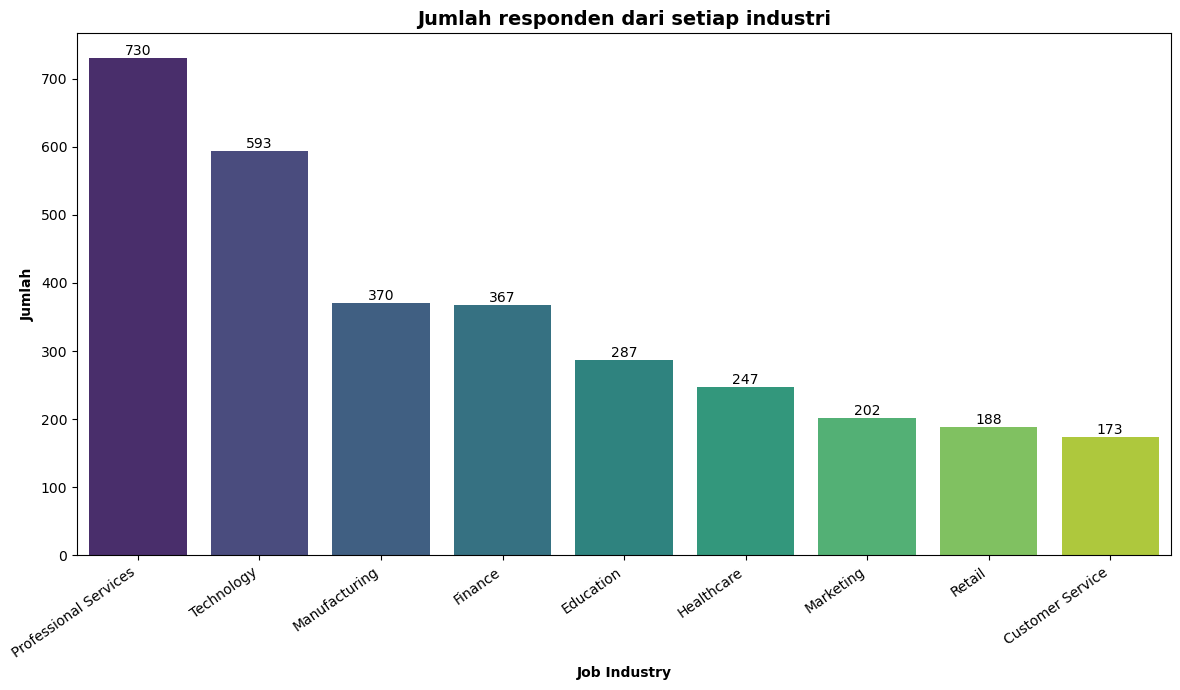

In [36]:
job_counts = df.groupby('Industry').size().sort_values(ascending=False)

#visualisasi dengan bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')
plt.title('Jumlah responden dari setiap industri', fontsize=14, weight='bold')
ax = plt.gca()
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])
ax.bar_label(ax.containers[5])
ax.bar_label(ax.containers[6])
ax.bar_label(ax.containers[7])
ax.bar_label(ax.containers[8])
plt.xlabel('Job Industry', weight = 'bold')
plt.ylabel('Jumlah', weight = 'bold')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()

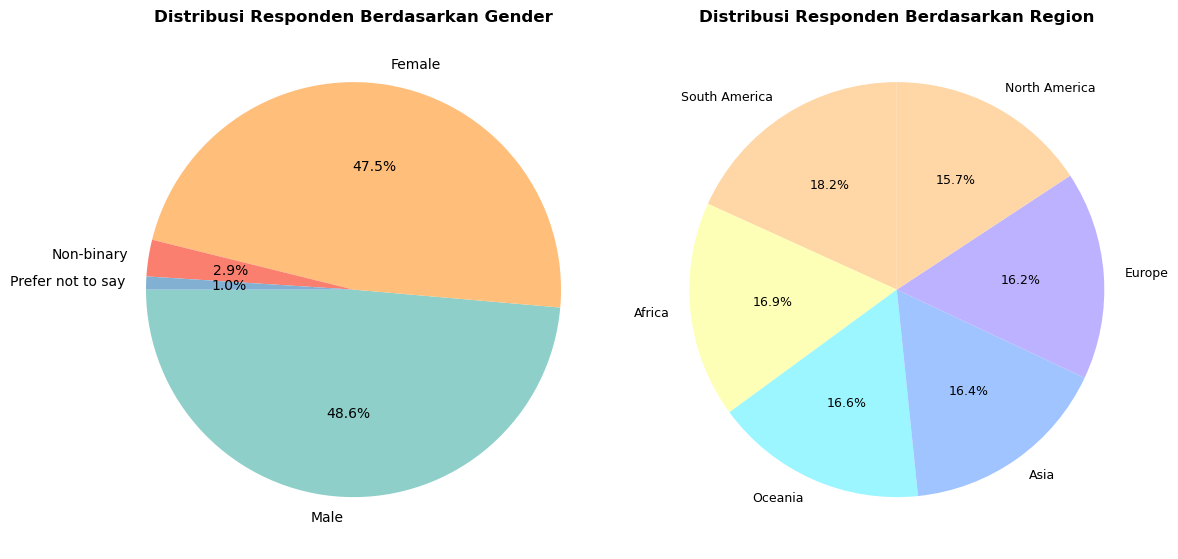

In [37]:
gender_counts = df['Gender'].value_counts()
region_counts = df['Region'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180, colors=['#8ECFC9', '#FFBE7A', '#FA7F6F', '#82B0D2'], textprops={'color': 'black', 'fontsize': 10})
axes[0].set_title('Distribusi Responden Berdasarkan Gender', fontsize=12, fontweight='bold', color='black')

axes[1].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FFD6A5', '#FDFFB6', '#9BF6FF', '#A0C4FF', '#BDB2FF'], textprops={'color': 'black', 'fontsize': 9})
axes[1].set_title('Distribusi Responden Berdasarkan Region', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

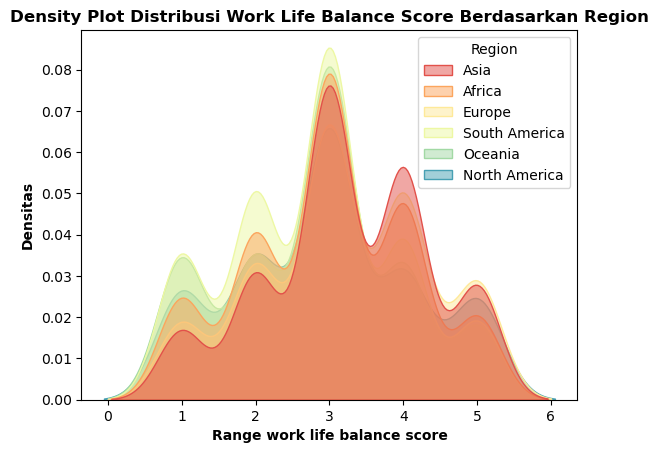

In [39]:
sns.kdeplot(data=df, x='Work_Life_Balance_Score', hue='Region', fill=True, alpha=0.5, palette='Spectral')
plt.title('Density Plot Distribusi Work Life Balance Score Berdasarkan Region', weight='bold')
plt.xlabel('Range work life balance score', weight = 'bold')
plt.ylabel('Densitas', weight = 'bold')
plt.show()

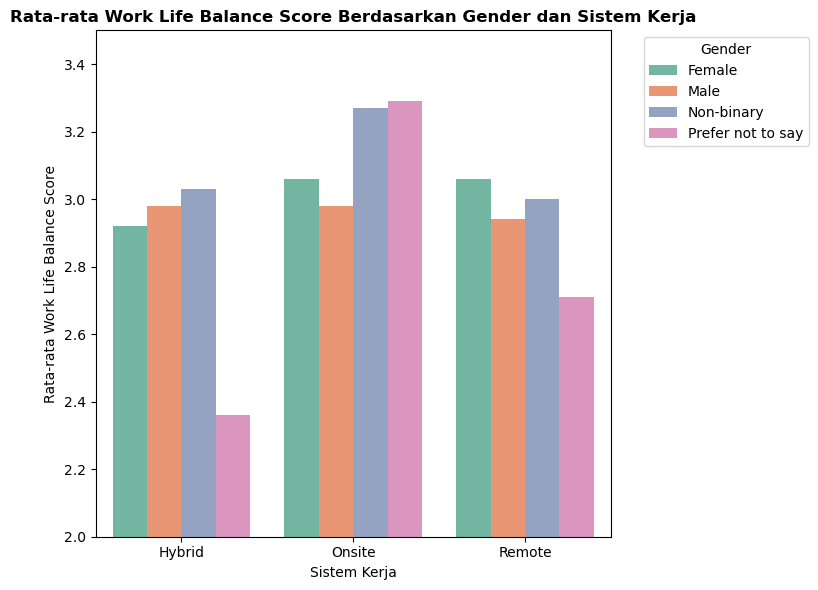

In [40]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=mean_wlb,
    x='Work_Arrangement',
    y='Work_Life_Balance_Score',
    hue='Gender',
    palette='Set2'
)

plt.title('Rata-rata Work Life Balance Score Berdasarkan Gender dan Sistem Kerja', weight='bold')
plt.xlabel('Sistem Kerja')
plt.ylabel('Rata-rata Work Life Balance Score')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(2.0, 3.5)
plt.tight_layout()
plt.show()

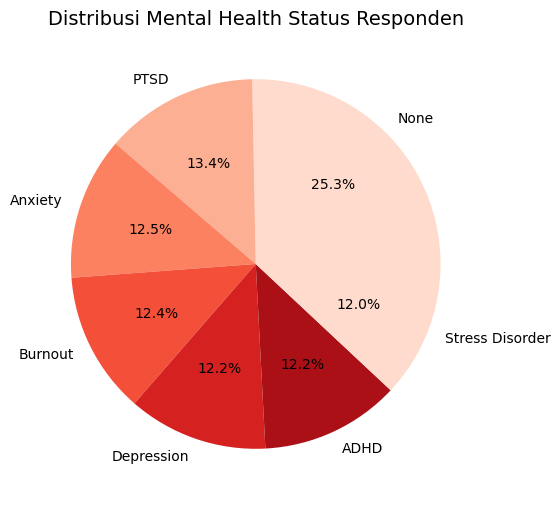

In [41]:
mental_counts = df.groupby('Mental_Health_Status').size().sort_values(ascending=False)

# Buat pie chart
plt.figure(figsize=(6,6))
plt.pie(mental_counts,
        labels=mental_counts.index,
        autopct='%1.1f%%',
        colors=sns.color_palette('Reds'))

plt.title('Distribusi Mental Health Status Responden', fontsize=14, color='Black')
plt.show()

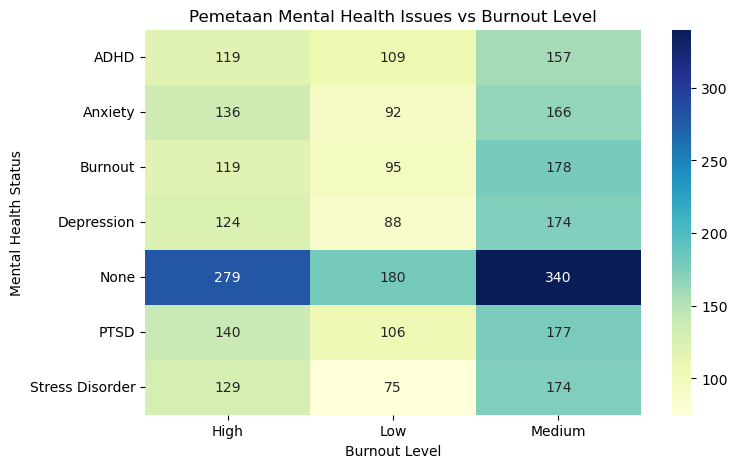

In [42]:
cross = pd.crosstab(df['Mental_Health_Status'], df['Burnout_Level'])

plt.figure(figsize=(8,5))
sns.heatmap(cross, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Pemetaan Mental Health Issues vs Burnout Level')
plt.xlabel('Burnout Level')
plt.ylabel('Mental Health Status')
plt.show()

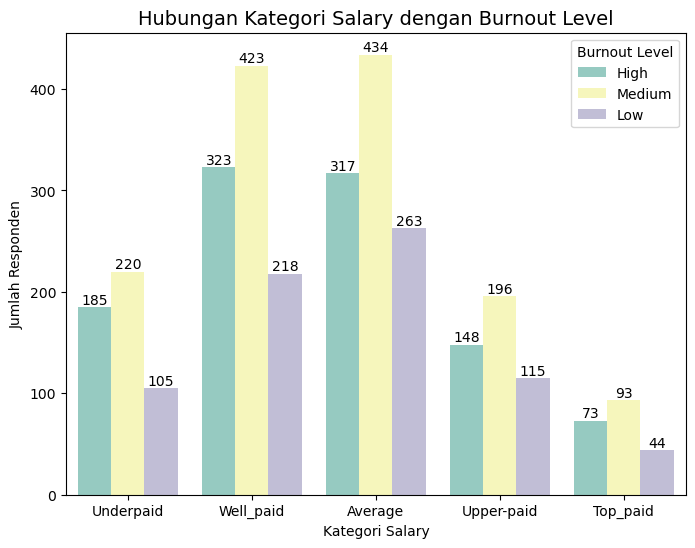

In [43]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Categorize_Salary', hue='Burnout_Level', palette='Set3')
plt.title('Hubungan Kategori Salary dengan Burnout Level', fontsize=14)
ax = plt.gca()
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
plt.xlabel('Kategori Salary')
plt.ylabel('Jumlah Responden')
plt.legend(title='Burnout Level')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_21788\1247814538.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=burnout_by_job, x='Count', y='Job_Role', palette='flare')


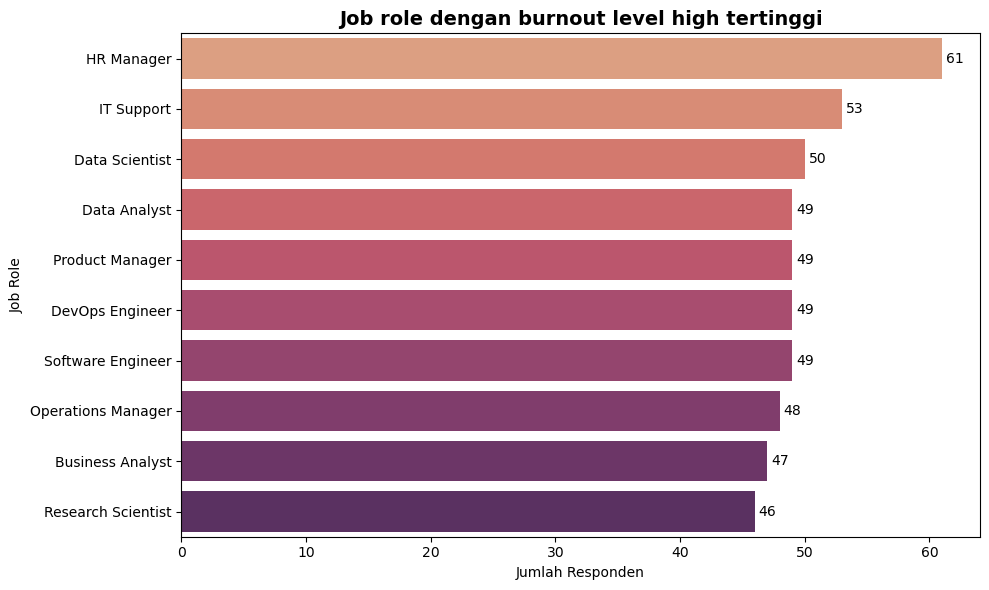

In [44]:
burnout_high = df[df['Burnout_Level'] == 'High']
burnout_by_job = burnout_high['Job_Role'].value_counts().reset_index().head(10)
burnout_by_job.columns = ['Job_Role', 'Count']
burnout_by_job = burnout_by_job.sort_values(by='Count', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=burnout_by_job, x='Count', y='Job_Role', palette='flare')
for i, v in enumerate(burnout_by_job['Count']):
    plt.text(v + 0.3, i, str(v), color='black', va='center')

plt.title('Job role dengan burnout level high tertinggi', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Responden')
plt.ylabel('Job Role')
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_21788\2398862229.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=low_wlb_count, x='Count', y='Job_Role', palette='Spectral')


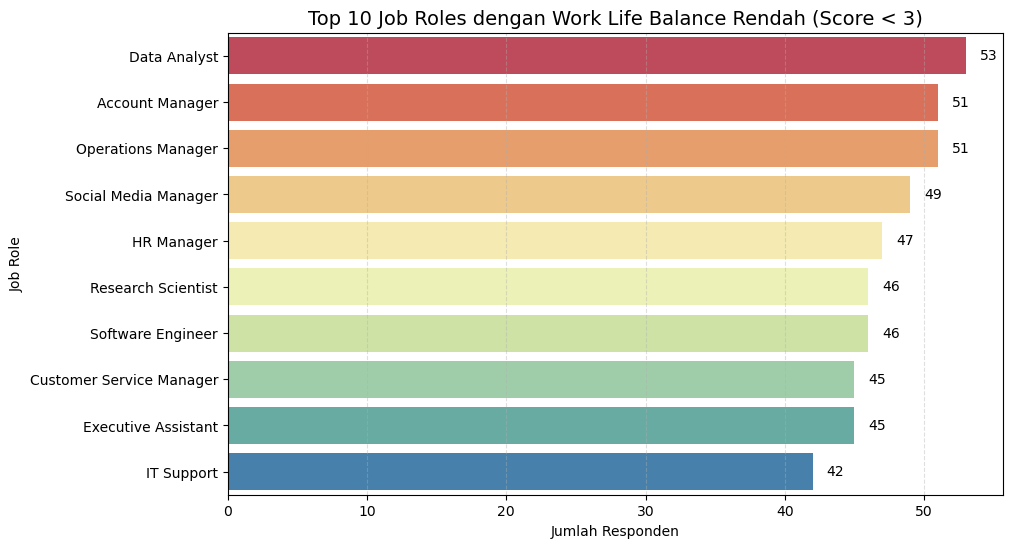

In [45]:
# Filter data dengan Work Life Balance Score < 3
low_wlb = df[df['Work_Life_Balance_Score'] < 3]

# Menghitung jumlah responden per Job Role
low_wlb_count = low_wlb['Job_Role'].value_counts().head(10).reset_index()
low_wlb_count.columns = ['Job_Role', 'Count']

# Visualisasi dengan barplot
plt.figure(figsize=(10,6))
sns.barplot(data=low_wlb_count, x='Count', y='Job_Role', palette='Spectral')
plt.title('Top 10 Job Roles dengan Work Life Balance Rendah (Score < 3)', fontsize=14)
plt.xlabel('Jumlah Responden')
plt.ylabel('Job Role')
plt.grid(axis='x', linestyle='--', alpha=0.4)
for index, value in enumerate(low_wlb_count['Count']):
    plt.text(value + 1, index, str(value), va='center')
plt.show()

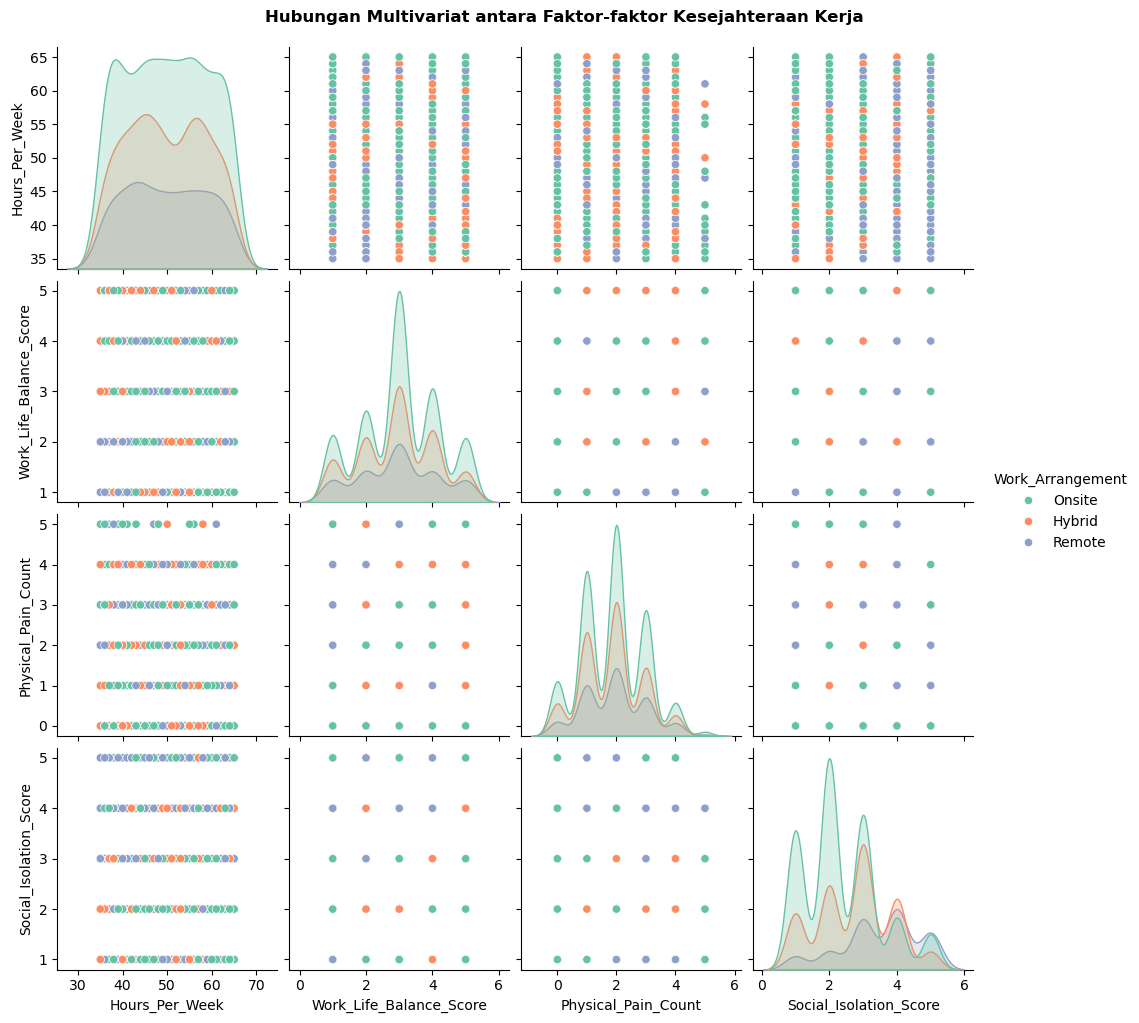

In [46]:
cols = ['Hours_Per_Week', 'Work_Life_Balance_Score', 'Physical_Pain_Count', 'Social_Isolation_Score', 'Work_Arrangement']

sns.pairplot(
    df[cols],
    hue='Work_Arrangement',
    palette='Set2',
    diag_kind='kde'
)
plt.suptitle('Hubungan Multivariat antara Faktor-faktor Kesejahteraan Kerja', y=1.02, weight='bold')
plt.show()

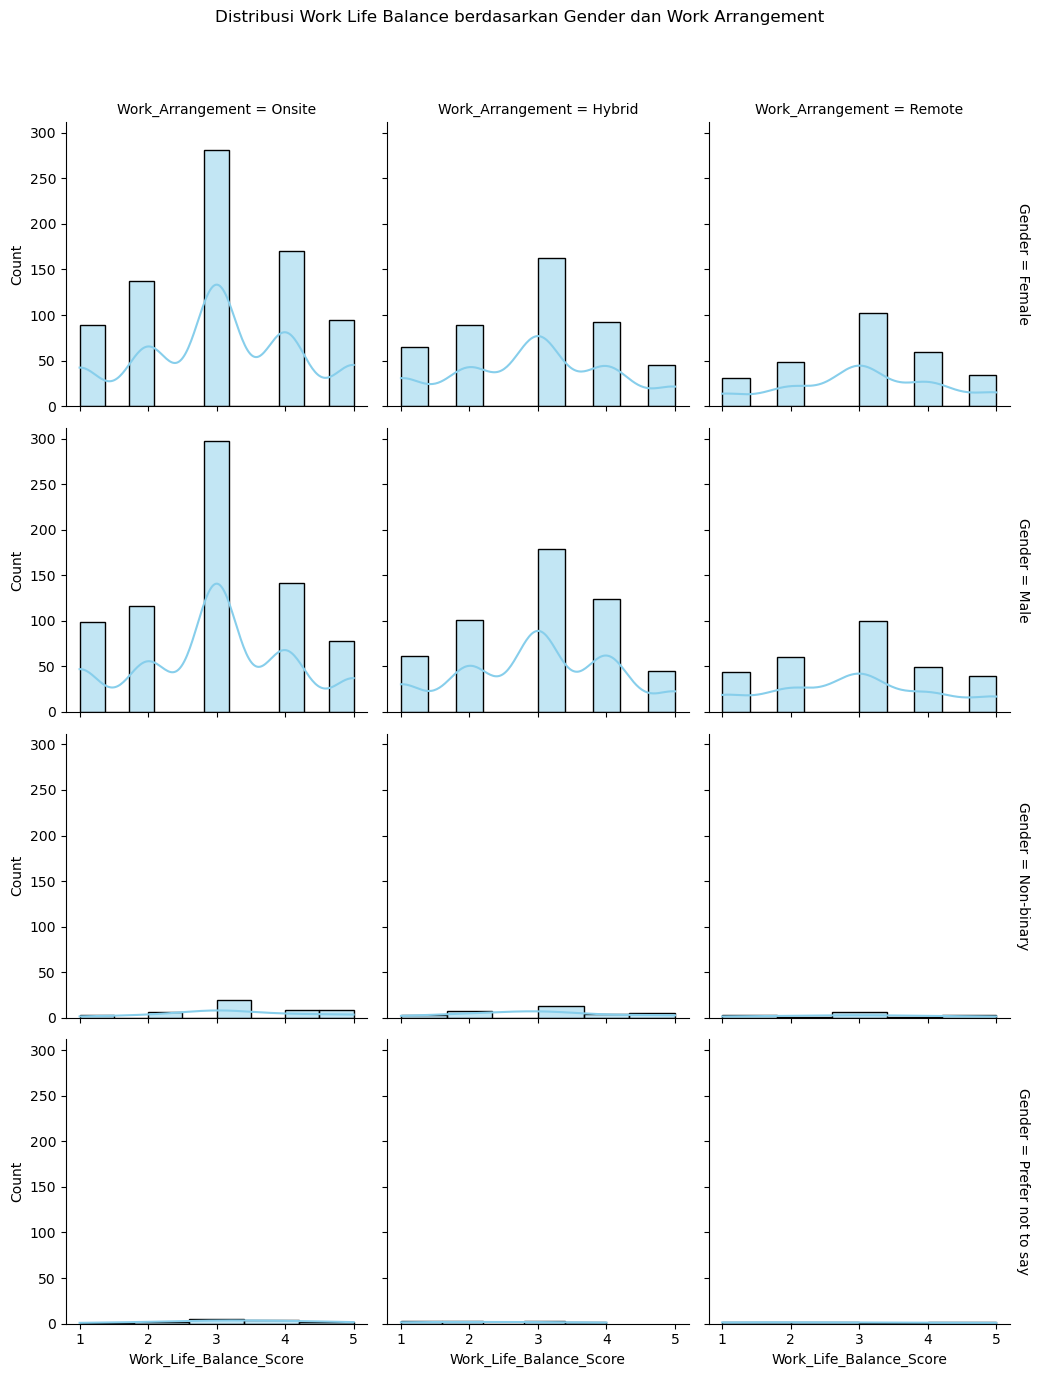

In [47]:
g = sns.FacetGrid(df, row='Gender', col='Work_Arrangement', margin_titles=True, height=3.5)
g.map(sns.histplot, 'Work_Life_Balance_Score', kde=True, color='skyblue')

plt.subplots_adjust(top=0.9)
plt.suptitle('Distribusi Work Life Balance berdasarkan Gender dan Work Arrangement')
plt.show()

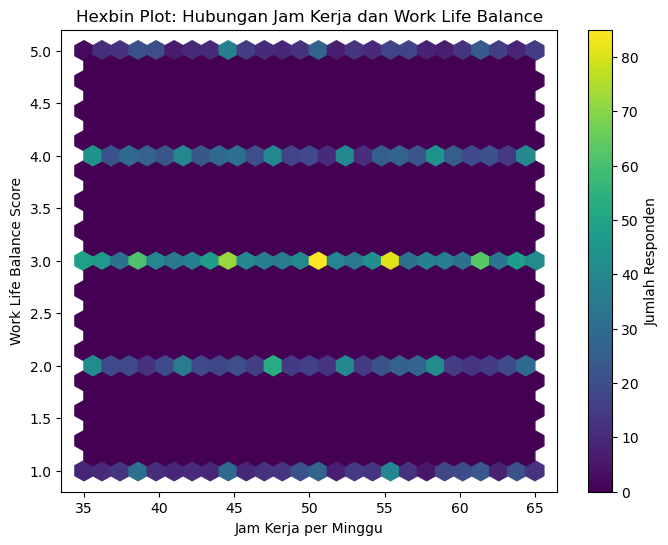

In [48]:
plt.figure(figsize=(8,6))
plt.hexbin(
    df['Hours_Per_Week'],
    df['Work_Life_Balance_Score'],
    gridsize=25,
    cmap='viridis'
)
plt.colorbar(label='Jumlah Responden')
plt.title('Hexbin Plot: Hubungan Jam Kerja dan Work Life Balance')
plt.xlabel('Jam Kerja per Minggu')
plt.ylabel('Work Life Balance Score')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_21788\3305559486.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


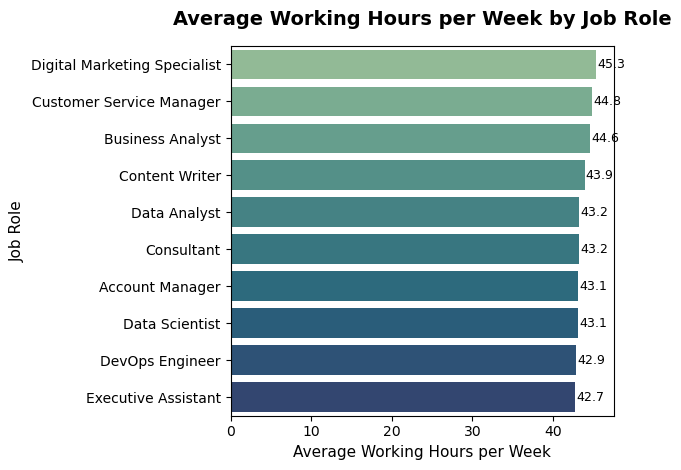

In [49]:
mean_hours = df.groupby('Job_Role')['Age'].mean().reset_index().round(1).head(10)
mean_hours = mean_hours.sort_values(by='Age', ascending=False)

colors = sns.color_palette("crest", len(mean_hours))
ax = sns.barplot(
    data=mean_hours,
    y='Job_Role',
    x='Age',
    palette=colors
)
for i, v in enumerate(mean_hours['Age']):
    ax.text(v + 0.15, i, str(v), color='black', va='center', fontsize=9)
plt.title('Average Working Hours per Week by Job Role', fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Average Working Hours per Week', fontsize=11)
plt.ylabel('Job Role', fontsize=11)
plt.tight_layout()
plt.show()

In [50]:
df.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range,Working_Hours_Category,Categorize_Salary,Physical_Pain_Count
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K,Overtime,Underpaid,2
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K,Below Average,Well_paid,1
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K,Below Average,Well_paid,2
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K,Overtime,Average,2
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,None,Medium,5,None,4,$60K-80K,Overtime,Average,0


In [51]:
df = df.copy()
df.to_csv('data_cleaned.csv', index=False)